Using customer segmentation businesses can better understand their target audience. The goal of K-Means is to group all the data available into non-overlapping sub-groups that are distinct from each other. This algorithm can take in unlabelled customer data and assign each data point to clusters.
That means each sub-group/cluster will consist of features that distinguish them from other clusters. Some drawbacks of this dataset is that it has a low number of instances/rows as well as variables/columns.


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [5]:
## Code piece to mount my Google Drive
from google.colab import drive 
drive.mount("/content/drive", force_remount=True)

# Change the working directory to Colab Notebooks
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [74]:

# reading the data frame

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [76]:
df.shape

(200, 5)

Data Pre-Processing


CustomerID is the unique identifier of each customer in the dataset, and we can drop this variable. It doesn't provide us with any useful cluster information.

Since gender is a categorial variable, it needs to be encoded and converted into numeric.

All other variables will be scaled to follow a normal distribution before being fed into the model. We will standardize these variables with a mean of 0 and a standard deviation of 1.


In [53]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [54]:
gender = df['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


Modeling:
Method K clusters

Text(0, 0.5, 'Inertia')

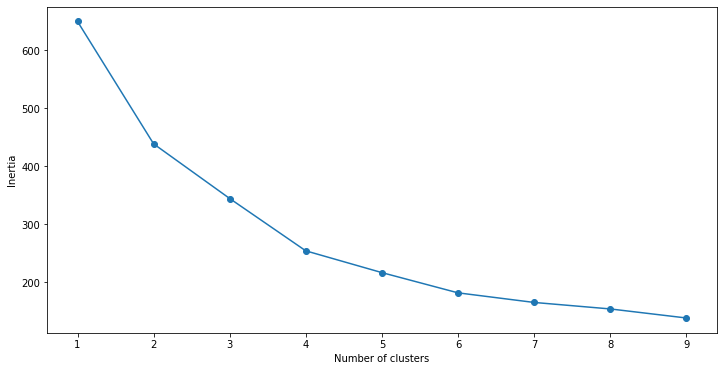

In [55]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can see that the optimal number of clusters is 4.



A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.



In [56]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


C'mon we can do better then .35 score!

In [57]:
newdf

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1
...,...,...,...,...
195,2.268791,-0.276302,1.118061,1
196,2.497807,0.441365,-0.861839,1
197,2.497807,-0.491602,0.923953,0
198,2.917671,-0.491602,-1.250054,0


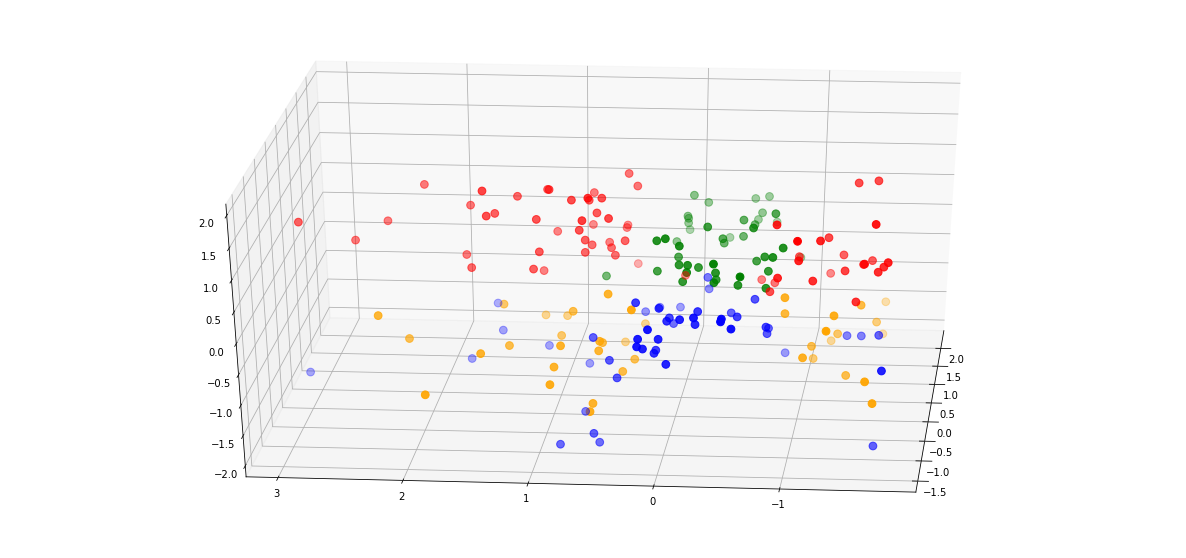

In [58]:
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='orange', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)

ax.view_init(30, 185)
plt.show()

This model could be better if we could more clearly define the different clusters. 

Use PCA for feature selection to help build second model

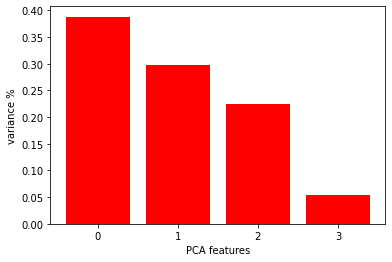

In [59]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Based on this visualization, we can see that the first two PCA components explain around 70% of the dataset variance.

We can feed these two components into the model.

Lets build the model again with the first two principal components, and decide on the number of clusters to use:


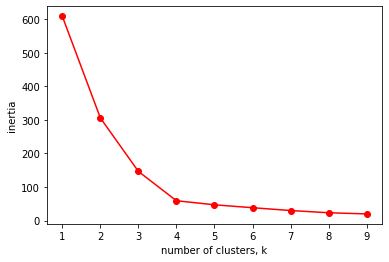

In [60]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

optimal number of clusters is 4.

In [61]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 


0.6795898993599507


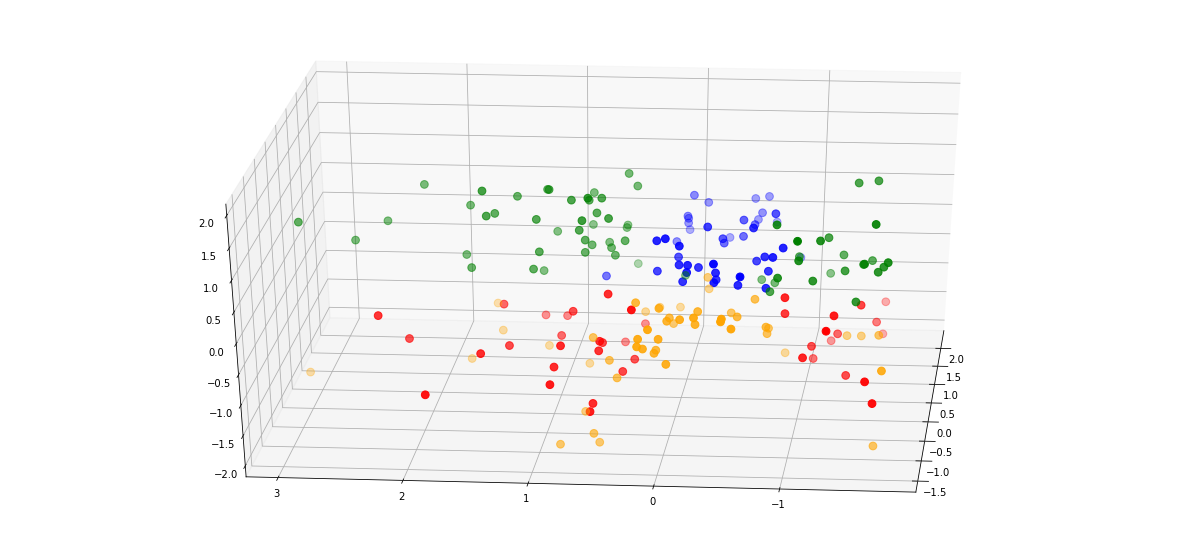

In [62]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [63]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [64]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,56.333333,54.266667,49.066667
1,1,47.625000,63.500000,16.050000
2,2,30.292308,63.830769,79.815385
3,3,27.220000,59.620000,40.040000


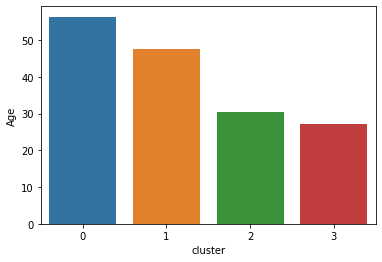

In [65]:
sns.barplot(x='cluster',y='Age',data=avg_df)


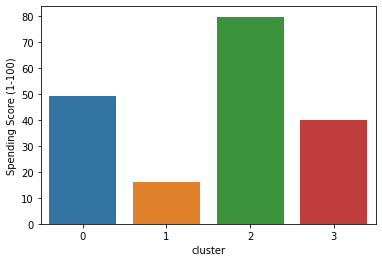

In [66]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)


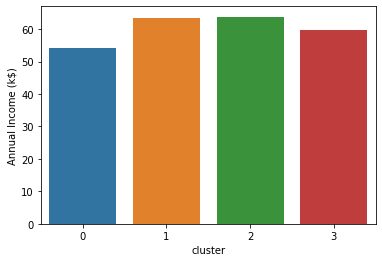

In [67]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [72]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head(10)

Gender
cluster Gender        
0       Female      26
        Male        19
1       Female      18
        Male        22
2       Female      37
        Male        28
3       Female      31
        Male        19

**Analysis and Take aways
**

Main attributes of each segment
Cluster 0:

High average annual income, low spending.
Mean age is around 40 and gender is predominantly male.
Cluster 1:

Low to mid average income, average spending capacity.
Mean age is around 50 and gender is predominantly female.
Cluster 2:

Low average income, high spending score.
Mean age is around 25 and gender is predominantly female.
Cluster 3:

High average income, high spending score.
Mean age is around 30 and gender is predominantly female.

Cluster 0: The frugal spender
This persona comprises of middle aged individuals who are very careful with money.

Despite having the highest average income compared to individuals in all other clusters, they spend the least.

This might be because they have financial responsibilities - like saving up for their kid's higher education.

Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.

Cluster 1: Almost retired
This segment comprises of an older group of people.

They earn less and spend less, and are probably saving up for retirement.

Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

Cluster 2: The careless buyer
This segment is made up of a younger age group.

Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.

However, they are very high spenders.

These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.

Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

Cluster 3: Highly affluent individuals
This segment is made up of middle-aged individuals.

These are individuals who have worked hard to build up a significant amount of wealth.

They also spend large amounts of money to live a good lifestyle.

These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.

Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

